# Ingreso a Drive y GitHub

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from getpass import getpass

PASS = getpass('Enter your password')

!git config --global user.email "jltg_1501@hotmail.com"
!git config --global user.name "Jorge-1501"
!git config --global user.password {PASS}

Enter your password··········


In [4]:
!pwd

/content


In [5]:
%cd /content/drive/MyDrive/Colab_GitHub/Redes-Neuronales/Digitos/src

/content/drive/MyDrive/Colab_GitHub/Redes-Neuronales/Digitos/src


In [ ]:
!ls -al

conv.py			   network2.py
Épocas_dígitos.png	   network3.py
Épocas_SGDconMomentum.png  network.py
expand_mnist.py		   __pycache__
.ipynb_checkpoints	   Reconocimiento_digitos.ipynb
mnist_average_darkness.py  Tarea_2.pdf
mnist_loader.py		   Tarea3-Redes.ipynb
mnist_svm.py


In [ ]:
!git status

Refresh index: 100% (96/96), done.
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
#!git add .

In [ ]:
#!git commit -m 'Notebook creada: Tarea3-Redes'

In [ ]:
#!git push

# Inicio de la Tarea 3

## Parte 1
Red con Keras

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

In [13]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
# Reestructuración los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
# Creación del modelo [784, 30, 10]
model = models.Sequential()
model.add(layers.Dense(784, activation='sigmoid', input_shape=(28 * 28,)))
model.add(layers.Dense(30, activation='sigmoid', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
# Compilar el modelo
custom_optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-09)

model.compile(optimizer = custom_optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=30, batch_size=10, validation_split=0.2)

Epoch 1/30
4800/4800 [==============================] - 22s 4ms/step - loss: 0.3658 - accuracy: 0.8999 - val_loss: 0.1831 - val_accuracy: 0.9463
Epoch 2/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1560 - accuracy: 0.9538 - val_loss: 0.1286 - val_accuracy: 0.9644
Epoch 3/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1088 - accuracy: 0.9679 - val_loss: 0.1111 - val_accuracy: 0.9695
Epoch 4/30
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0855 - accuracy: 0.9754 - val_loss: 0.1062 - val_accuracy: 0.9716
Epoch 5/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0691 - accuracy: 0.9805 - val_loss: 0.1052 - val_accuracy: 0.9716
Epoch 6/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0560 - accuracy: 0.9840 - val_loss: 0.1110 - val_accuracy: 0.9722
Epoch 7/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0491 - accuracy: 0.9867 - val_loss: 0.0976 - val_ac

In [18]:
# Evaluación el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1202 - accuracy: 0.9819
Precisión en el conjunto de prueba: 0.9818999767303467


In [19]:
import matplotlib.pyplot as plt

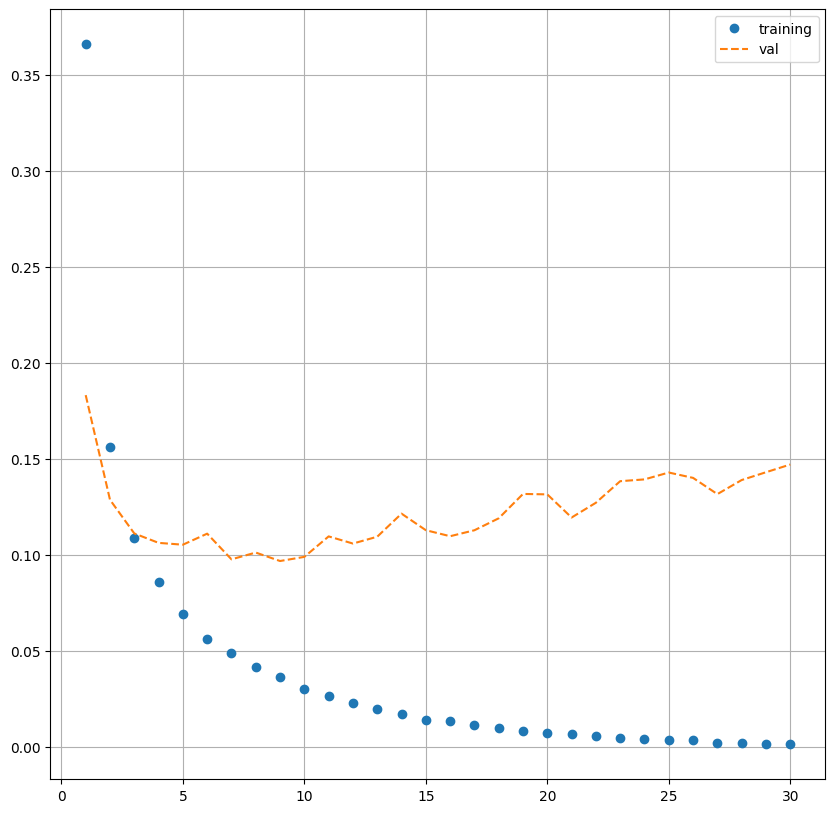

In [20]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.grid()
plt.show()

¿Obtuviste resultados similares? No, fueron notablemente mejores. Se obtuvo un accurancy del 0.9815 contra un 0.8412 del anterior modelo utilizando CPU. Mientras que al cambiar el entorno a una T4 GPU el tiempo se redujo a 9 minutos y un accurancy de 0.9818. El sobreajuste se mantiene igual en cada caso.


¿Tardó lo mismo para entrenar el mismo número de epocas? Tardó menos, un aproximado de 21 minutos contra los casi 30 anteriormente.

In [21]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [22]:
!git status
!git add .
!git commit -m "Modificación de entorno y corrección de número de capas en parte 1 de tarea 3"
!git push

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
[main 1e1f601] Modificación de entorno y corrección de número de capas en parte 1 de tarea 3
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Digitos/src/Tarea3-Redes.ipynb (98%)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 29.68 KiB | 2.97 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Jorge-1501/Redes-Neuronales
   fb88598..1e1f601  main -> main


## Parte 2
Modificacion de parámetros

In [23]:
#import tensorflow as tf
#import matplotlib.pyplot as plt
#from tensorflow.keras import layers, models
#from tensorflow.keras.datasets import mnist
#from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Reestructuración los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [24]:
# Creación del modelo
model2 = models.Sequential()
model2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model2.add(layers.Dense(30, activation='relu', input_shape=(28 * 28,)))
model2.add(layers.Dense(10, activation='softmax'))

In [25]:
# Compilar el modelo
custom_optimizer2 = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model2.compile(optimizer = custom_optimizer2,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [26]:
# Entrenar el modelo
history2 = model2.fit(train_images, train_labels, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
4800/4800 [==============================] - 24s 5ms/step - loss: 0.3773 - accuracy: 0.8982 - val_loss: 0.1842 - val_accuracy: 0.9497
Epoch 2/50
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1574 - accuracy: 0.9556 - val_loss: 0.1350 - val_accuracy: 0.9621
Epoch 3/50
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1097 - accuracy: 0.9691 - val_loss: 0.1134 - val_accuracy: 0.9671
Epoch 4/50
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0826 - accuracy: 0.9764 - val_loss: 0.1003 - val_accuracy: 0.9697
Epoch 5/50
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0655 - accuracy: 0.9814 - val_loss: 0.0879 - val_accuracy: 0.9753
Epoch 6/50
4800/4800 [==============================] - 19s 4ms/step - loss: 0.0514 - accuracy: 0.9858 - val_loss: 0.0896 - val_accuracy: 0.9733
Epoch 7/50
4800/4800 [==============================] - 17s 3ms/step - loss: 0.0413 - accuracy: 0.9888 - val_loss: 0.0799 - val_ac

In [27]:
# Evaluación el modelo en el conjunto de prueba
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc2)

313/313 [==============================] - 1s 3ms/step - loss: 0.1383 - accuracy: 0.9798
Precisión en el conjunto de prueba: 0.9797999858856201


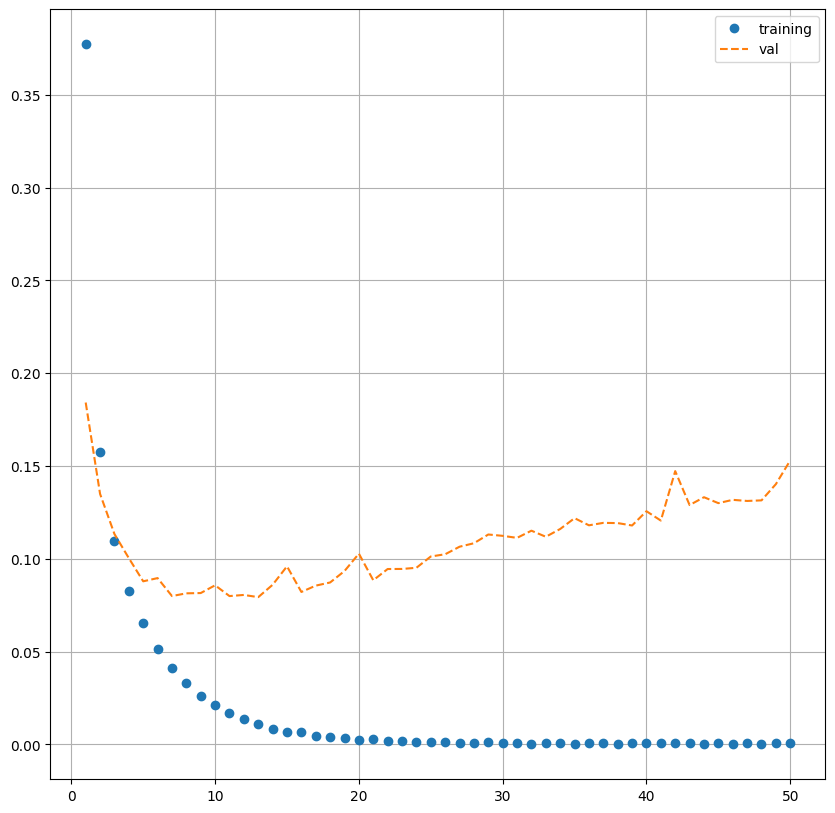

In [28]:
history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values2)+1)
plt.plot(epoch,loss_values2, 'o',label='training')
plt.plot(epoch,val_loss_values2, '--',label='val')
plt.legend()
plt.grid()
plt.show()

En esta red seleccioné un activación 'relu' para las capas ocultas y una softmax para la última capa. Aumenté el número de epocas por 50 y trabajé con una $\eta = 0.0001$ y Modifiqué el número de neuronas utilizadas de ([784,30,10]) por ([512,30,10]).
Los resultados fueron un mayor sobreajuste y saltos en la convergencia final, por estar muy cerca del accurancy de 1.000.

In [ ]:
!git status
!git add .
!git commit -m "Cambio de función de activación, número de neuronas y optimizador, mayor sobreajuste"
!git push

## Parte 3
Implimentación de regularizadores

# Reporte de resultados

In [ ]:
!pwd